In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [0]:
# Input image dimensions
img_rows, img_cols = 28, 28

# The number of training samples per batch. 128 is a reasonable number.
batch_size = 128

# Our data set contains 10 digits, so the number of classes is 10
num_classes = 10

# epochs is the number of times the model is trained with the data set, more can be better, up to a point
epochs = 20

# dropout is a common regularization hyperperameter. It helps to avoid overfitting or memorizing the input.
dropout = 0.5

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Save original test images for display purposes
orig_test = x_test

The following cell displays random test images to get an idea of what they look like.

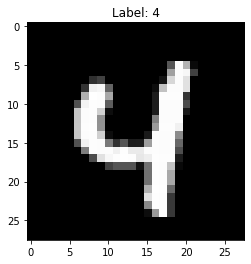

In [8]:
index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title('Label: %d' % y_test[index])
plt.show()

DATA PREPARATION

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0 #DL model works best in the range of 0-1 

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


This model uses two convolutional layers, a max pooling layer, a dense layer, and a one-hot encoded output layer. Even with these few layers, this model can achieve over 99% accuracy.

In [10]:
#Defining model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Epoch 1/20
469/469 [==============================] - 7s 16ms/step - loss: 0.2407 - accuracy: 0.9273 - val_loss: 0.0526 - val_accuracy: 0.9828
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0880 - accuracy: 0.9738 - val_loss: 0.0372 - val_accuracy: 0.9880
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0657 - accuracy: 0.9804 - val_loss: 0.0392 - val_accuracy: 0.9870
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0524 - accuracy: 0.9841 - val_loss: 0.0318 - val_accuracy: 0.9909
Epoch 5/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0286 - val_accuracy: 0.9911
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0392 - accuracy: 0.9873 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0283 - val_accuracy: 0.9919

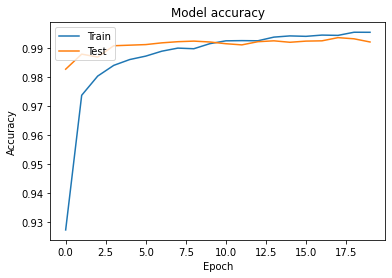

In [11]:
#Training model

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

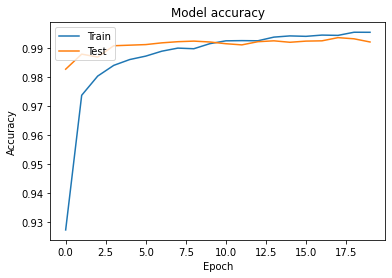

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Predictions

In [0]:

predictions = model.predict(x_test)
most_likely = predictions.argmax(1) #argmax takes the most likely value

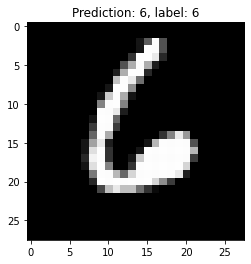

prediction time 0.21279120445251465 seconds


In [0]:
import time
start_time=time.time()

index = random.randrange(10000)
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.imshow(orig_test[index], cmap='gray')
plt.show()

print("prediction time", time.time()-start_time,"seconds")

In [0]:
import time
start_time = time.time()
print(time.time()-start_time)

3.504753112792969e-05


**Error analysis**

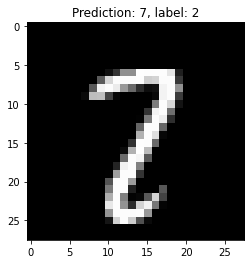

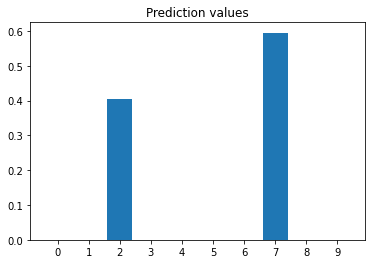

prediction time 0.361706018447876 seconds


In [0]:
start_time = time.time()

for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title('Prediction: %d, label: %d' % (most_likely[index], y_test[index]))
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()

#error might be due to inclination of numbers or handwriting issues.

print("prediction time",time.time()-start_time,"seconds")